## **Pytorch** - *an open-source python-based machine and deep learning framework*

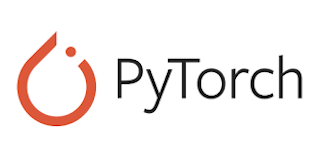






> **Features of Pytorch**
*   *Versatile Collection of Modules:* PyTorch comes with several specially developed modules like torchtext, torchvision, and torchaudio to work with different areas of deep learning like NLP, computer vision and speech processing.
*   *Numpy friendly:* PyTorch works with NumPy like tensor structures for its computations which are all GPU compatible.






### **Tensors**


> *  Tensors are a specialized data structure that are very similar to arrays and matrices. 
*   In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model’s parameters.
*   Tensors are similar to NumPy’s ndarrays.
*   Tensors can run on GPUs or other hardware accelerators.


Given below are some code blocks from the Pytorch documentation, we will be using them to illustrate some of the basics of pytorch.

**Imports**

In [1]:
import torch
import numpy as np

**Initializing a Tensor**

In [ ]:
#Directly from Data
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)
x_data

tensor([[1, 2],
        [3, 4]])

In [ ]:
#Directly from numpy array
data = [[1, 2],[3, 4]]
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
x_np

tensor([[1, 2],
        [3, 4]])

In [ ]:
#from another tensor
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.6497, 0.1447],
        [0.9441, 0.8307]]) 



In [ ]:
#with random or consistent values
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.8622, 0.8255, 0.7509],
        [0.0895, 0.9290, 0.2056]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


**Attributes of a Tensor**

In [ ]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [ ]:
a = torch.randn((2,3,4))
print(a.size(0))
print(a.size(-1))


tensor([[[-0.6400, -0.6148, -0.5022,  0.3841],
         [-1.9566,  2.0675,  1.0225, -1.5795],
         [ 0.2921, -1.9360, -0.4533,  0.8601]],

        [[-0.7256,  0.4435, -1.0161,  0.9379],
         [-2.3315,  0.3454, -0.0912,  1.2097],
         [-0.7070, -0.8314,  1.1929,  1.8518]]])

**Moving a Tensor to the GPU**

In [ ]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
  print('cuda')
  tensor = tensor.to('cuda')
else:
  print('cpu')

cpu


## **Arithemetic Operations**

In [ ]:
#Joining tensors
tensor = torch.rand(3,4)
print('Tensor')
print(tensor)
print('\n\n')

t1 = torch.cat([tensor, tensor, tensor], dim=0)
print('Concatenated Tensor')
print(t1)

Tensor
tensor([[0.5818, 0.2166, 0.4944, 0.1666],
        [0.7329, 0.9525, 0.1166, 0.3555],
        [0.9131, 0.4780, 0.1673, 0.8268]])



Concatenated Tensor
tensor([[0.5818, 0.2166, 0.4944, 0.1666],
        [0.7329, 0.9525, 0.1166, 0.3555],
        [0.9131, 0.4780, 0.1673, 0.8268],
        [0.5818, 0.2166, 0.4944, 0.1666],
        [0.7329, 0.9525, 0.1166, 0.3555],
        [0.9131, 0.4780, 0.1673, 0.8268],
        [0.5818, 0.2166, 0.4944, 0.1666],
        [0.7329, 0.9525, 0.1166, 0.3555],
        [0.9131, 0.4780, 0.1673, 0.8268]])


In [ ]:
# This computes the matrix multiplication between two tensors. y1, y2, y3 will have the same value
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(tensor)
torch.matmul(tensor, tensor.T, out=y3)

tensor([[0.6576, 0.7496, 0.8552],
        [0.7496, 1.5844, 1.4379],
        [0.8552, 1.4379, 1.7739]])

In [ ]:
# This computes the element-wise product. z1, z2, z3 will have the same value
z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

tensor([[0.3385, 0.0469, 0.2444, 0.0277],
        [0.5371, 0.9073, 0.0136, 0.1263],
        [0.8338, 0.2285, 0.0280, 0.6836]])

## **Neural Network**

**Imports**

In [ ]:
from torch import nn
import torch.nn.functional as F

In [ ]:
#checks if GPU is available
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))

Using cuda device


**Defining the Model**

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear1 = nn.Linear(28*28, 512)
        self.linear2 = nn.Linear(512, 512)
        self.linear3 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.flatten(x)

        x = self.linear1(x)
        x = F.relu(x)

        x = self.linear2(x)
        x = F.relu(x)

        x = self.linear3(x)
        x = F.relu(x)

        return x

In [ ]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear1): Linear(in_features=784, out_features=512, bias=True)
  (linear2): Linear(in_features=512, out_features=512, bias=True)
  (linear3): Linear(in_features=512, out_features=10, bias=True)
)


In [ ]:
#Passing input to a model
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([4], device='cuda:0')


## **Automatic Diffrentiation**

In [ ]:
import torch

In [ ]:
a = torch.tensor(2.0,requires_grad=True)
b = torch.tensor(3.0)
c = a*b

c.backward()

In [ ]:
c.is_leaf

False

In [ ]:
a.grad

tensor(3.)

Multiplication

In [ ]:
import torch
import numpy as np
import torch.nn.functional as F
a = torch.from_numpy(np.array([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]]]))
b = torch.from_numpy(np.array([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]]]))
print(a.shape)
print(b.shape)

torch.Size([2, 2, 3])
torch.Size([2, 2, 3])


In [ ]:
c = a*b
print(c)

tensor([[[  1,   4,   9],
         [ 16,  25,  36]],

        [[ 49,  64,  81],
         [100, 121, 144]]])


In [ ]:
d = F.softmax(c.to(torch.float64),dim=2)
d

tensor([[[3.3311e-04, 6.6906e-03, 9.9298e-01],
         [2.0611e-09, 1.6701e-05, 9.9998e-01]],

        [[1.2664e-14, 4.1399e-08, 1.0000e+00],
         [7.7811e-20, 1.0262e-10, 1.0000e+00]]], dtype=torch.float64)

In [ ]:
b = np.ones((2,2,2))
b[0,:,:] = 2
b

array([[[2., 2.],
        [2., 2.]],

       [[1., 1.],
        [1., 1.]]])

In [ ]:
b.shape

(1, 1, 1000)